In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import discriminant_analysis
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import pipeline
from sklearn import metrics

In [4]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [5]:
df = df_raw
df_X = df[[c for c in df.columns if c != 'vote']]
s_y = df.vote
X_raw = df_X.values
y_raw = s_y.values

In [6]:
# keep our own testing set to estimate the performance correctly
# see also: https://stats.stackexchange.com/q/224287
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_raw, y_raw, test_size=0.4, random_state=20200503
)

In [7]:
def get_pipe_name(pipe):
    return '-'.join(s[0] for s in pipe.steps)

In [8]:
pipe_list_1 = [
    
    # LDA
    
    pipeline.make_pipeline(
        discriminant_analysis.LinearDiscriminantAnalysis()
    ),
    # # lost
    # pipeline.make_pipeline(
    #     preprocessing.StandardScaler(),
    #     discriminant_analysis.LinearDiscriminantAnalysis()
    # ),
    # # lost
    # pipeline.make_pipeline(
    #     preprocessing.MinMaxScaler(),
    #     discriminant_analysis.LinearDiscriminantAnalysis()
    # ),
    
    # logit
    
    # # can't converge
    # pipeline.make_pipeline(
    #     linear_model.LogisticRegression(random_state=20201017)
    # ),
    pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        linear_model.LogisticRegression(random_state=20201017)
    ),
    # # lost
    # pipeline.make_pipeline(
    #     preprocessing.MinMaxScaler(),
    #     linear_model.LogisticRegression(random_state=20201017)
    # ),
    
    # linear SVC
    
    # # can't converge
    # pipeline.make_pipeline(
    #     svm.LinearSVC(random_state=20200503)
    # ),
    # # lost
    # pipeline.make_pipeline(
    #     preprocessing.StandardScaler(),
    #     svm.LinearSVC(random_state=20200503),
    # ),
    pipeline.make_pipeline(
        preprocessing.MinMaxScaler(),
        svm.LinearSVC(random_state=20200503),
    ),
    
    # KNN
    #
    # In the `knn.ipynb`, we use the `NearestNeighbors` to recommend. Here we 
    # use the `KNeighborsClassifier` to classify. The core algorithms, KNN, are 
    # the same, but the problems they resolve are slightly different.
    
    # # lost
    # pipeline.make_pipeline(
    #     preprocessing.StandardScaler(),
    #     neighbors.KNeighborsClassifier(),
    # ),
    pipeline.make_pipeline(
        preprocessing.MinMaxScaler(),
        neighbors.KNeighborsClassifier(),
    ),
    
    # the more complex models: SVC with RBF, and trees
    
    pipeline.make_pipeline(
        preprocessing.MinMaxScaler(),
        svm.SVC(kernel='rbf', random_state=20200503),
    ),
    pipeline.make_pipeline(
        ensemble.RandomForestClassifier(random_state=20200503),
    ),
    pipeline.make_pipeline(
        ensemble.GradientBoostingClassifier(random_state=20200503),
    ),
    
    # the winners + k-best by F-statistic
    
    pipeline.make_pipeline(
        feature_selection.SelectKBest(feature_selection.f_classif, k=3),
        discriminant_analysis.LinearDiscriminantAnalysis()
    ),
    pipeline.make_pipeline(
        feature_selection.SelectKBest(feature_selection.f_classif, k=3),
        preprocessing.StandardScaler(),
        linear_model.LogisticRegression(random_state=20201017)
    ),
    pipeline.make_pipeline(
        feature_selection.SelectKBest(feature_selection.f_classif, k=3),
        preprocessing.MinMaxScaler(),
        svm.LinearSVC(random_state=20200503),
    ),
    pipeline.make_pipeline(
        feature_selection.SelectKBest(feature_selection.f_classif, k=3),
        preprocessing.MinMaxScaler(),
        neighbors.KNeighborsClassifier(),
    ),
    pipeline.make_pipeline(
        feature_selection.SelectKBest(feature_selection.f_classif, k=3),
        preprocessing.MinMaxScaler(),
        svm.SVC(kernel='rbf', random_state=20200503),
    ),
    pipeline.make_pipeline(
        feature_selection.SelectKBest(feature_selection.f_classif, k=3),
        ensemble.RandomForestClassifier(random_state=20200503),
    ),
    pipeline.make_pipeline(
        feature_selection.SelectKBest(feature_selection.f_classif, k=3),
        ensemble.GradientBoostingClassifier(random_state=20200503),
    ),

]

cv_list_1 = [
    # cv will split our `train` into its `train`/`test`
    # cv's `test` is also called “validation set”
    model_selection.cross_validate(pipe, X_train, y_train,
                                   return_train_score=True)
    for pipe in pipe_list_1
]

Check the overall performances:

,pipe_name,n,fit_time,score_time,test_score,train_score
0,lineardiscriminantanalysis,0,0.002633,0.000589,0.938596,0.922566
1,lineardiscriminantanalysis,1,0.001273,0.000269,0.902655,0.938190
2,lineardiscriminantanalysis,2,0.001558,0.000305,0.920354,0.933775
3,lineardiscriminantanalysis,3,0.001450,0.000265,0.973451,0.913907
4,lineardiscriminantanalysis,4,0.001256,0.000267,0.902655,0.935982
...,...,...,...,...,...,...
65,selectkbest-gradientboostingclassifier,0,0.050980,0.000756,0.938596,0.951327
66,selectkbest-gradientboostingclassifier,1,0.050218,0.000695,0.884956,0.958057
67,selectkbest-gradientboostingclassifier,2,0.050434,0.000953,0.929204,0.953642
68,selectkbest-gradientboostingclassifier,3,0.050060,0.000664,0.973451,0.944812


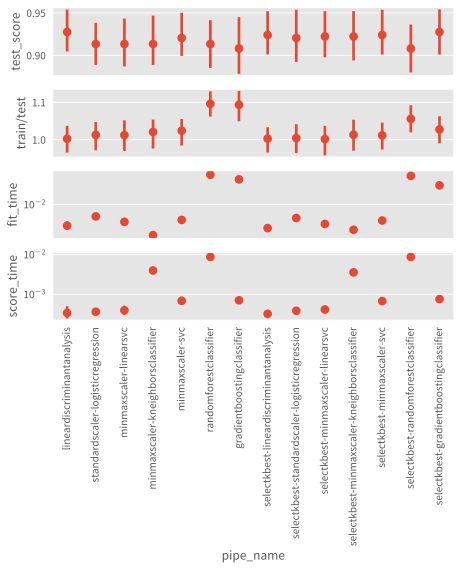

In [9]:
df = pd.concat(map(pd.DataFrame, cv_list_1),
               keys=map(get_pipe_name, pipe_list_1),
               names=['pipe_name', 'n'])
df = df.reset_index()
with pd.option_context('display.max_rows', 10):  # just tl;dr
    display(df)
cv_1_df = df

fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(4, 1, sharex=True)

sns.pointplot(data=df, x='pipe_name', y='test_score', join=False, ax=ax_1)
ax_1.set_xlabel('')

# check for overfitting: the train/test should be around 1
sns.pointplot(data=df, x='pipe_name', y=df.train_score/df.test_score, join=False, ax=ax_2)
ax_2.set_xlabel('')
ax_2.set_ylabel('train/test')

sns.pointplot(data=df, x='pipe_name', y='fit_time', join=False, ax=ax_3)
ax_3.set_yscale('log')
ax_3.set_xlabel('')

sns.pointplot(data=df, x='pipe_name', y='score_time', join=False, ax=ax_4)
ax_4.set_yscale('log')

plt.xticks(rotation=90)
plt.show()

Select the best pipeline by _test_score/time_:

In [10]:
df = cv_1_df
df = (df
      .groupby('pipe_name')
      [['test_score', 'fit_time', 'score_time']]
      .mean())
df = df.assign(test_score_per_time=df.test_score/(df.fit_time+df.score_time))
df = df.sort_values('test_score_per_time', ascending=False)
display(df)

pipe_name = df.index[0]
pipe = next(pipe
            for pipe in pipe_list_1
            if get_pipe_name(pipe) == pipe_name)

pipe.fit(X_train, y_train)
y_test_hat = pipe.predict(X_test)

print(f'Our own testing set metrics of the best pipeline ({pipe_name}) by test_score/time:\n')
print(metrics.classification_report(y_test, y_test_hat))
# or make another cross-validation

,test_score,fit_time,score_time,test_score_per_time
pipe_name,,,,
selectkbest-lineardiscriminantanalysis,0.924034,0.001335,0.000323,557.314652
lineardiscriminantanalysis,0.927542,0.001634,0.000339,470.115573
selectkbest-minmaxscaler-linearsvc,0.922264,0.001896,0.000414,399.225340
minmaxscaler-linearsvc,0.913399,0.002266,0.000396,343.095337
selectkbest-minmaxscaler-svc,0.924034,0.002545,0.000674,287.095733
minmaxscaler-svc,0.920494,0.002668,0.000683,274.651457
selectkbest-standardscaler-logisticregression,0.920478,0.003149,0.000384,260.521029
standardscaler-logisticregression,0.913399,0.003587,0.000363,231.283424
selectkbest-minmaxscaler-kneighborsclassifier,0.922279,0.001158,0.003549,195.915842


Our own testing set metrics of the best pipeline (selectkbest-lineardiscriminantanalysis) by test_score/time:

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       226
         1.0       0.84      0.91      0.87       152

    accuracy                           0.89       378
   macro avg       0.89      0.90      0.89       378
weighted avg       0.90      0.89      0.89       378



Try if _precision_ or _recall_ is more important:

In [11]:
# metrics.SCORERS.keys()
# metrics.SCORERS['precision_macro']
# # -> make_scorer(precision_score, average=binary)

# the `cv_list` uses the different scorings from the above one
cv_list = [
    model_selection.cross_validate(pipe, X_train, y_train,
                                   scoring=['precision_macro',
                                            'recall_macro',
                                            'f1_macro'])
    for pipe in pipe_list_1
]

df = pd.concat(map(pd.DataFrame, cv_list),
               keys=map(get_pipe_name, pipe_list_1),
               names=['pipe_name', 'n'])
df = df.reset_index()

df = (df
      .groupby('pipe_name')
      [['test_precision_macro', 'test_recall_macro', 'test_f1_macro']]
      .mean())

print('If precision_macro is more important:')
df = df.sort_values('test_precision_macro', ascending=False)
display(df.head(3))

print('If recall_macro is more important:')
df = df.sort_values('test_recall_macro', ascending=False)
display(df.head(3))

# note the scores are biased, should report like the above

If precision_macro is more important:


,test_precision_macro,test_recall_macro,test_f1_macro
pipe_name,,,
selectkbest-gradientboostingclassifier,0.927631,0.925063,0.925632
lineardiscriminantanalysis,0.925458,0.928793,0.926342
selectkbest-minmaxscaler-svc,0.922729,0.923076,0.922439


If recall_macro is more important:


,test_precision_macro,test_recall_macro,test_f1_macro
pipe_name,,,
lineardiscriminantanalysis,0.925458,0.928793,0.926342
selectkbest-gradientboostingclassifier,0.927631,0.925063,0.925632
selectkbest-lineardiscriminantanalysis,0.921900,0.924166,0.922632
